# Import Package

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset

In [ ]:
admit = pd.read_csv('/content/drive/MyDrive/Kumpulan Data Set Bootcamp DS 11A/boston.csv')
admit.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Data Preprocessing

## Missing Value

In [ ]:
admit.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
admit.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
features = list(admit)[:-1]

## Correlation with original dataset

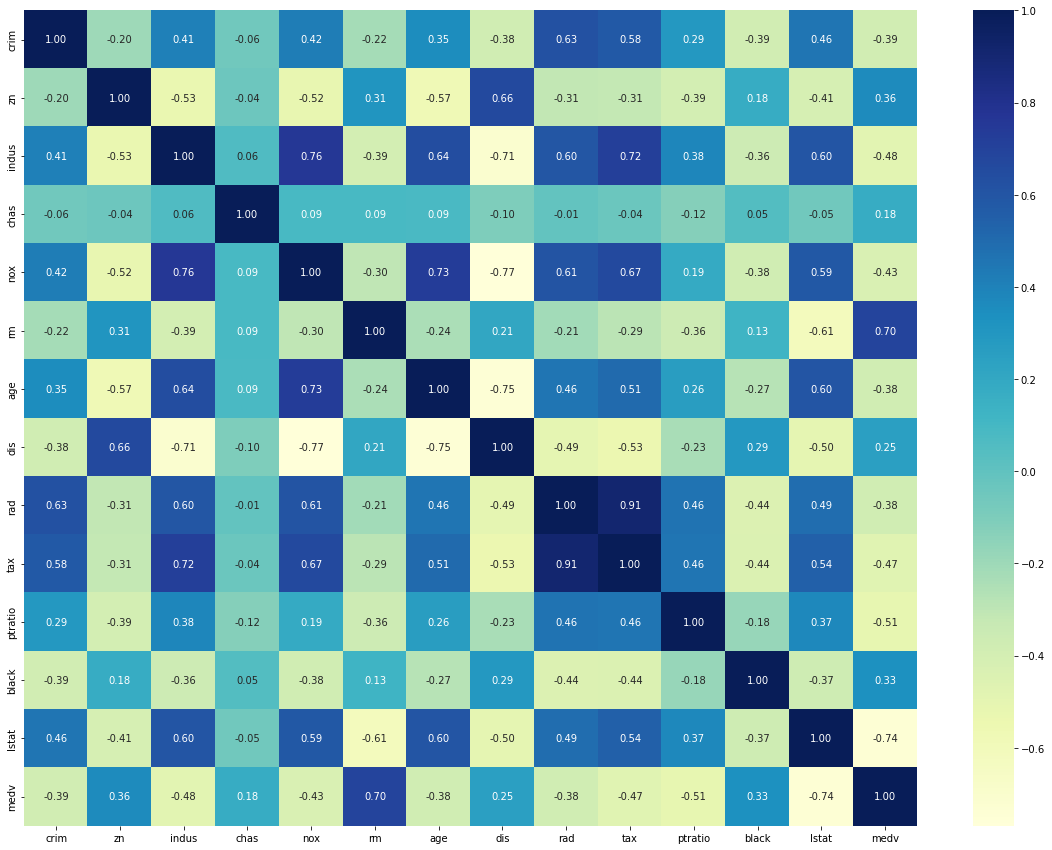

In [ ]:
# heatmap correlation
corr = admit.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt='.2f', cmap="YlGnBu")
plt.show()

## Outlier Handling

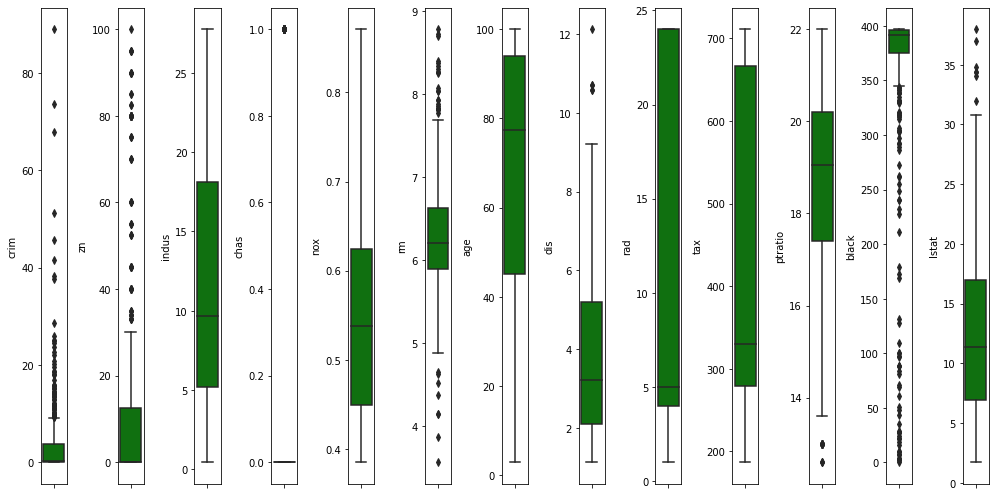

In [ ]:
features = features
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 14, i+1)
    sns.boxplot( y=admit[features[i]], color='green' )
    plt.tight_layout()

In [ ]:
for i in features:
    admit[i] = np.log(admit[i] + 1)
admit.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.006300,2.944439,1.196948,0.0,0.430483,2.024853,4.192680,1.627278,0.693147,5.693732,2.791165,5.986201,1.788421,24.0
1,0.026944,0.000000,2.088153,0.0,0.384582,2.004314,4.380776,1.786261,1.098612,5.493061,2.933857,5.986201,2.316488,21.6
2,0.026924,0.000000,2.088153,0.0,0.384582,2.102303,4.128746,1.786261,1.098612,5.493061,2.933857,5.975919,1.615420,34.7
3,0.031857,0.000000,1.156881,0.0,0.377066,2.079192,3.845883,1.954757,1.386294,5.407172,2.980619,5.980479,1.371181,33.4
4,0.066770,0.000000,1.156881,0.0,0.377066,2.097650,4.010963,1.954757,1.386294,5.407172,2.980619,5.986201,1.845300,36.2


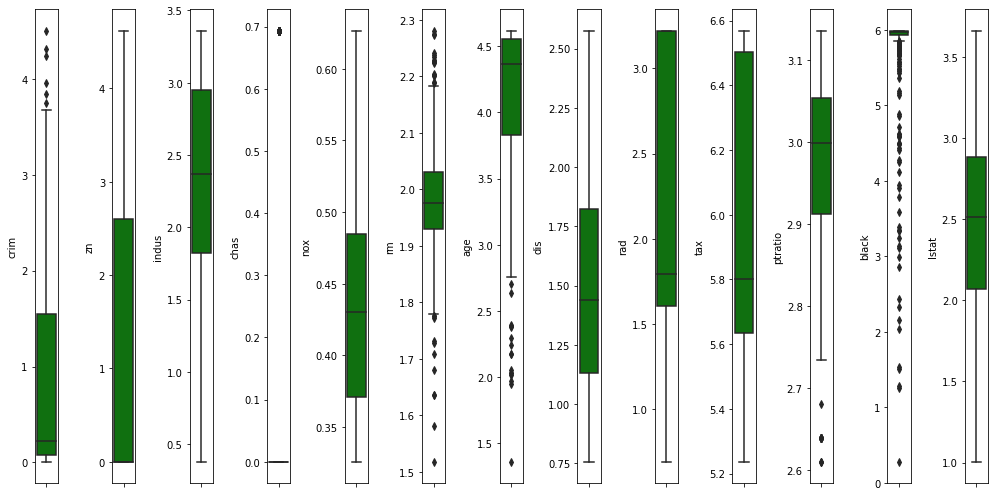

In [ ]:
features = features
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 14, i+1)
    sns.boxplot( y=admit[features[i]], color='green' )
    plt.tight_layout()

# Split data: train - validate - test

In [ ]:
from sklearn.model_selection import train_test_split

feature = admit.drop(columns='medv')
target = admit[['medv']]

feature_admit_pretrain, feature_admit_test, target_admit_pretrain, target_admit_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_admit_train, feature_admit_validation, target_admit_train, target_admit_validation = train_test_split(feature_admit_pretrain, target_admit_pretrain, test_size=0.20, random_state=42)

### Recheck VIF

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_admit_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,6.124919
2,zn,2.584408
3,indus,3.662281
4,chas,1.106805
5,nox,5.393735
6,rm,2.184502
7,age,2.438783
8,dis,5.509106
9,rad,4.999647
10,tax,4.421877


**Observasi:**

Kita akan cek Multicollinearity dahulu menggunakan VIF, apakah terdapat multicollinearity pada feature diatas?

Setelah dicek denga random_state = 42 berdasarkan skor diatas dapat disimpulkan, terdapat multikolinearitas:
*  `crim`
*  `indus`
*  `nox`
*  `dis`
*  `rad`
*  `tax`
*  `lstat` 







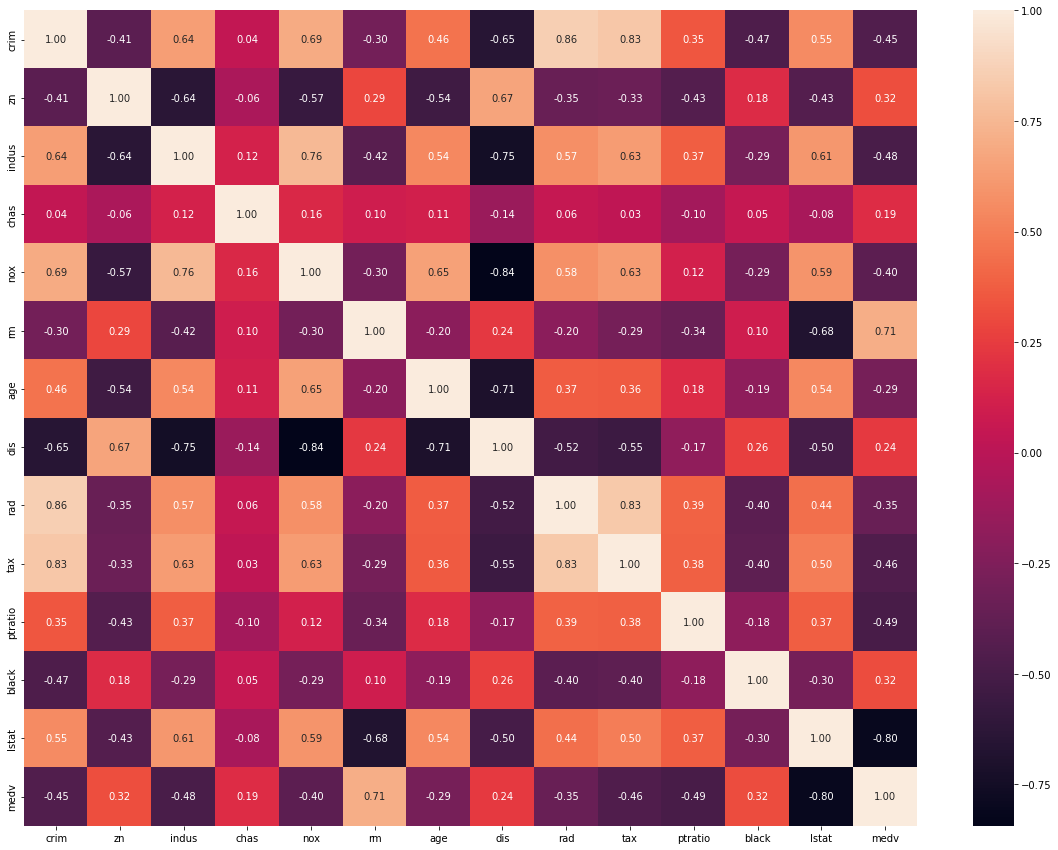

In [ ]:
# heatmap correlation
admit_train = pd.concat([feature_admit_train, target_admit_train], axis=1)
corr = admit_train.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

**Observasi:**

Dapat terlihat bahwa `crim`,`rad` dan `tax` mempunyai correlation yang tinggi walaupun correlation dengan targetnya terhitung kecil. Namun saya akan tetap mengeleminasinya karena dilihat mempunyai vif_score yang cukup tinggi maka dipastikan mempunyai multicollinearity yang tinggi. Maka dipilih **`tax`** & **`crim`** yang akan di drop karena nilai multicollinearity yang paling tinggi.

## Drop Multicollinear Features

In [ ]:
# drop redundant features
feature_admit_train = feature_admit_train.drop(columns=['tax','crim'])
feature_admit_validation = feature_admit_validation.drop(columns=['tax','crim'])
feature_admit_test = feature_admit_test.drop(columns=['tax','crim'])

In [ ]:
X = add_constant(feature_admit_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,zn,2.426134
2,indus,3.541898
3,chas,1.101475
4,nox,5.135942
5,rm,2.169956
6,age,2.401877
7,dis,5.154617
8,rad,2.070458
9,ptratio,1.854211
10,black,1.246226


**Observasi**

Dengan nilai VIF ini sudah cukup karena tidak ada nilai yang lebih dari 5, dengan ini nilai masih bisa ditoleransi

# Fit models on training data (lambdas = [0.01, 0.1, 1, 10])

## Train Multiple Models Ridge

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_admit_train = feature_admit_train.to_numpy()
y_admit_train = target_admit_train.to_numpy()
y_admit_train = y_admit_train.reshape(len(y_admit_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_admit_train, y_admit_train)
ridge_reg_pointone.fit(X_admit_train, y_admit_train)
ridge_reg_one.fit(X_admit_train, y_admit_train)
ridge_reg_ten.fit(X_admit_train, y_admit_train)

Ridge(alpha=10, random_state=42)

## Train Multiple Models Lasso

In [ ]:
from sklearn.linear_model import Lasso

# train the model
X_admit_train = feature_admit_train.to_numpy()
y_admit_train = target_admit_train.to_numpy()
y_admit_train = y_admit_train.reshape(len(y_admit_train),)

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_admit_train, y_admit_train)
lasso_reg_pointone.fit(X_admit_train, y_admit_train)
lasso_reg_one.fit(X_admit_train, y_admit_train)
lasso_reg_ten.fit(X_admit_train, y_admit_train)

Lasso(alpha=10, random_state=42)

# Choose the best lambda from the validation set

## Find the best model (alpha) RMSE Ridge

In [ ]:
from sklearn.metrics import mean_squared_error

X_admit_validation = feature_admit_validation.to_numpy()
y_admit_validation = target_admit_validation.to_numpy()
y_admit_validation = y_admit_validation.reshape(len(y_admit_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_admit_validation)
    rmse = np.sqrt(mean_squared_error(y_admit_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.335796604617808
RMSE of Ridge regression model with alpha = 0.1 is 4.283017707851825
RMSE of Ridge regression model with alpha = 1.0 is 4.216217027005898
RMSE of Ridge regression model with alpha = 10 is 4.237450289877931


**Observasi :**

Setelah di cek maka didapatkan bahwa RMSE terkecil ada pada alpha 1. Kita akan melihat lagi apakah RMSE ini benar-benar yang terbaik dengan cara melihat nilai coefficientnya

## Find the best model (alpha) RMSE Lasso

In [ ]:
from sklearn.metrics import mean_squared_error

X_admit_validation = feature_admit_validation.to_numpy()
y_admit_validation = target_admit_validation.to_numpy()
y_admit_validation = y_admit_validation.reshape(len(y_admit_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_admit_validation)
    rmse = np.sqrt(mean_squared_error(y_admit_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 4.259829531537493
RMSE of Lasso regression model with alpha = 0.1 is 4.218574488025087
RMSE of Lasso regression model with alpha = 1.0 is 4.777718812485473
RMSE of Lasso regression model with alpha = 10 is 8.432236862996595


**Observasi :**

Setelah di cek maka didapatkan bahwa RMSE terkecil ada pada alpha 0,1. Kita akan melihat lagi apakah RMSE ini benar-benar yang terbaik dengan cara melihat nilai coefficientnya

## Coefficient Tour Ridge

In [ ]:
model = ridge_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_admit_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,71.171248
1,zn,-0.102354
2,indus,-1.247416
3,chas,4.633698
4,nox,-36.204929
5,rm,22.338086
6,age,0.680093
7,dis,-8.576311
8,rad,0.811764
9,ptratio,-16.920134


In [ ]:
model = ridge_reg_pointone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_admit_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,67.065936
1,zn,-0.071347
2,indus,-1.461678
3,chas,4.488502
4,nox,-28.414788
5,rm,21.159650
6,age,0.681403
7,dis,-7.970288
8,rad,0.675918
9,ptratio,-15.638062


In [ ]:
model = ridge_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_admit_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,61.296850
1,zn,0.069049
2,indus,-2.113056
3,chas,4.057086
4,nox,-8.340454
5,rm,14.288729
6,age,0.852765
7,dis,-6.482525
8,rad,0.305502
9,ptratio,-11.032404


In [ ]:
model = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_admit_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,54.991910
1,zn,0.265147
2,indus,-2.336816
3,chas,2.895003
4,nox,-0.624001
5,rm,4.689842
6,age,1.139752
7,dis,-4.724686
8,rad,-0.075544
9,ptratio,-4.302781


## Coefficient Tour Lasso

In [ ]:
model = lasso_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_admit_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,64.861156
1,zn,-0.044401
2,indus,-1.420166
3,chas,4.217418
4,nox,-26.100644
5,rm,20.861264
6,age,0.663845
7,dis,-7.737350
8,rad,0.576278
9,ptratio,-14.962941


In [ ]:
model = lasso_reg_pointone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_admit_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,61.412263
1,zn,0.154072
2,indus,-1.706058
3,chas,1.654242
4,nox,-0.000000
5,rm,6.473108
6,age,0.970492
7,dis,-5.010907
8,rad,-0.000000
9,ptratio,-6.378229


In [ ]:
model = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_admit_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,49.325089
1,zn,0.000000
2,indus,-0.000000
3,chas,0.000000
4,nox,-0.000000
5,rm,0.000000
6,age,0.000000
7,dis,-0.000000
8,rad,-0.000000
9,ptratio,-0.000000


In [ ]:
model = lasso_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_admit_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.786068
1,zn,0.000000
2,indus,-0.000000
3,chas,0.000000
4,nox,-0.000000
5,rm,0.000000
6,age,-0.000000
7,dis,0.000000
8,rad,-0.000000
9,ptratio,-0.000000


## Best Model Ridge

In [ ]:
ridge_best = ridge_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_admit_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,61.296850
1,zn,0.069049
2,indus,-2.113056
3,chas,4.057086
4,nox,-8.340454
5,rm,14.288729
6,age,0.852765
7,dis,-6.482525
8,rad,0.305502
9,ptratio,-11.032404


**Observasi :**

Ternyata alpha yang lebih baik dari pada 1 adalah alpha dengan nilai 10. Karena melihat coefficientnya lebih kecil dibandingkan coefficient dengan alpha 1

## Best Model Lasso

In [ ]:
lasso_best = lasso_reg_pointone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_admit_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,61.296850
1,zn,0.069049
2,indus,-2.113056
3,chas,4.057086
4,nox,-8.340454
5,rm,14.288729
6,age,0.852765
7,dis,-6.482525
8,rad,0.305502
9,ptratio,-11.032404


**Observasi :**

Ternyata alpha yang lebih baik dari pada 0,1 adalah alpha dengan nilai 10. Karena melihat coefficientnya lebih kecil dibandingkan coefficient dengan alpha 0,1

# Evaluate the best models on the test data 

## Model Evaluation Ridge

In [ ]:
ridge_best = ridge_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_admit_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,61.296850
1,zn,0.069049
2,indus,-2.113056
3,chas,4.057086
4,nox,-8.340454
5,rm,14.288729
6,age,0.852765
7,dis,-6.482525
8,rad,0.305502
9,ptratio,-11.032404


### Diagnostic Study

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_admit_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_admit_train)))

R-squared for training data is 0.7026544676998221


**Observasi**

Ketepatan model dalam memprediksi adalah 70%

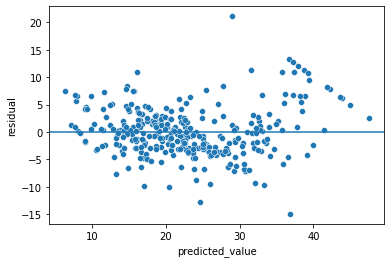

In [ ]:
# calculate residuals
residual = y_admit_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

**Observasi :**

*  Hubuhan linier terpenuhi karena bepusat pada 0
*  Varians dari resedual tidak stabil karena dapat dilihat varian diujungnya berjarak jauh menyimpang dari 0
*  Observasi independent, karena tidak ada pola tertentu dari titik-titik residual

### Training Error

In [ ]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_admit_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_admit_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_admit_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_admit_train)))

RMSE for training data is 4.469103756084367
MAE for training data is 3.3691381095819195
MAPE for training data is 0.16137890380636802


**Observasi :**

*  RMSE : Standar deviasi kesalahan prediksi adalah 4,46. Yaitu dari garis regresi, residual sebagian besar menyimpang antara +- 4,46
*  MAE : Secara rata-rata, prediksi kita menyimpang dari `medv` yang sebenarnya sebesar 3,36
*  MAPE : 3,36 ini setara dengan deviasi 16% relatif terhadap `medv` yang sebenarnya
*  Saya berasumsi bahwa model ini bersifat underfit

note :
perbedaan error antara RMSE dan MAE
dimana RMSE > MAE disebabkan adanya target yang outlier
tetapi perbedaan nya tidak terlalu besar sehingga dapat ditoleransi untuk outlier pada target

### Testing Error

In [ ]:
# prepare prediction result on test data
X_admit_test = feature_admit_test.to_numpy()
y_predict_test = ridge_best.predict(X_admit_test)

# ground truth target
y_admit_test = target_admit_test.to_numpy()
y_admit_test = y_admit_test.reshape(len(y_admit_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_admit_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_admit_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_admit_test)))

RMSE for testing data is 4.399500992942217
MAE for testing data is 2.944774461582792
MAPE for testing data is 0.17567697007088362


**Observasi :**

*  RMSE : RMSE : Standar deviasi kesalahan prediksi adalah 4,39. Yaitu dari garis regresi, residual sebagian besar menyimpang antara +- 4,39
*  MAE : Secara rata-rata, prediksi kita menyimpang dari `medv` yang sebenarnya sebesar 2,94
*  MAPE : 2,94 ini setara dengan deviasi 17% relatif terhadap `medv` yang sebenarnya
*  Saya berasumsi bahwa model ini bersifat underfit

note :
perbedaan error antara RMSE dan MAE
dimana RMSE > MAE disebabkan adanya target yang outlier
tetapi perbedaan nya tidak terlalu besar sehingga dapat ditoleransi untuk outlier pada target


## Model Evaluation Lasso

In [ ]:
ridge_best = lasso_reg_pointone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_admit_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,61.412263
1,zn,0.154072
2,indus,-1.706058
3,chas,1.654242
4,nox,-0.000000
5,rm,6.473108
6,age,0.970492
7,dis,-5.010907
8,rad,-0.000000
9,ptratio,-6.378229


### Diagnostic Study

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_admit_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_admit_train)))

R-squared for training data is 0.6332262627453086


**Observasi**

Ketepatan model dalam memprediksi adalah 63%

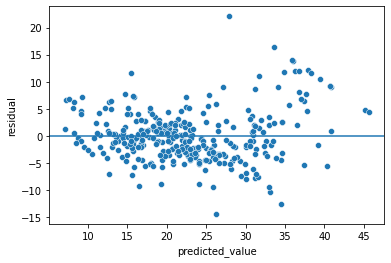

In [ ]:
# calculate residuals
residual = y_admit_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

**Observasi :**

*  Hubuhan linier terpenuhi karena bepusat pada 0
*  Varians dari resedual tidak stabil karena dapat dilihat varian diujungnya berjarak jauh menyimpang dari 0
*  Observasi independent, karena tidak ada pola tertentu dari titik-titik residual

### Training Error

In [ ]:
# prepare prediction result on train data
y_predict_train = lasso_best.predict(X_admit_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_admit_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_admit_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_admit_train)))

RMSE for training data is 4.734138741049704
MAE for training data is 3.548185104402026
MAPE for training data is 0.16388957571864948


**Observasi :**

*  RMSE : Standar deviasi kesalahan prediksi adalah 4,73. Yaitu dari garis regresi, residual sebagian besar menyimpang antara +- 4,73
*  MAE : Secara rata-rata, prediksi kita menyimpang dari `medv` yang sebenarnya sebesar 3,54
*  MAPE : 3,54 ini setara dengan deviasi 16% relatif terhadap `medv` yang sebenarnya
*  Saya berasumsi bahwa model ini bersifat underfit

note :
perbedaan error antara RMSE dan MAE
dimana RMSE > MAE disebabkan adanya target yang outlier
tetapi perbedaan nya tidak terlalu besar sehingga dapat ditoleransi untuk outlier pada target

### Testing Error

In [ ]:
# prepare prediction result on test data
X_admit_test = feature_admit_test.to_numpy()
y_predict_test = lasso_best.predict(X_admit_test)

# ground truth target
y_admit_test = target_admit_test.to_numpy()
y_admit_test = y_admit_test.reshape(len(y_admit_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_admit_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_admit_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_admit_test)))

RMSE for testing data is 4.509359957512589
MAE for testing data is 3.1213530544219314
MAPE for testing data is 0.17277182497889126


**Observasi :**

*  RMSE : Standar deviasi kesalahan prediksi adalah 4,50. Yaitu dari garis regresi, residual sebagian besar menyimpang antara +- 4,50
*  MAE : Secara rata-rata, prediksi kita menyimpang dari `medv` yang sebenarnya sebesar 3,12
*  MAPE : 3,12 ini setara dengan deviasi 17% relatif terhadap `medv` yang sebenarnya
*  Saya berasumsi bahwa model ini bersifat underfit

note :
perbedaan error antara RMSE dan MAE
dimana RMSE > MAE disebabkan adanya target yang outlier
tetapi perbedaan nya tidak terlalu besar sehingga dapat ditoleransi untuk outlier pada target